<a href="https://colab.research.google.com/github/Hertie-School-Machine-Learning-F2022/Class_Lab_06/blob/main/Class_Lab_06_GRAD_C24_fall_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification 

## GRAD-C24 - Lab 06

## Lab TA: Paulina Garcia Corral

In this lab we will see what classification is and how to evaluate a classification model using sklearn.

Class and code adapted from [KVSSetty](https://github.com/KVSSetty/ml-notebooks/blob/master/Plot%20a%20Decision%20Surface%20for%20Machine%20Learning%20Algorithms%20in%20Python/Plot%20a%20Decision%20Surface%20for%20Machine%20Learning%20Algorithms%20in%20Python.ipynb) and [SKLearn mooc course](https://github.com/INRIA/scikit-learn-mooc)

Classification is a ML task that, unlike prediction, needs a categorical target variable.

What are some examples of categorical target values?

Last week, we saw how the linear regression model uses the linear equation to calculate predicted values of y. 

Logistic Regression has a similar application, but instead of predicting a numerical or continous target, the model calculates a probability based on the logit, and if that predicted probability is above or below a certain threshold (usualy, 0.5) the values are classified as belonging to a class or not (in binary). 

In [ ]:
# We will use the following libraries for this exercise 
from google.colab import files
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

As a first example, we will work with pinguin data that is available in the github page.

The purpose of this demostration is to classify penguin species based on the dimensions of their beak, or for penguins, 'Culmen'.

In [ ]:
# Load the dataset called penguins_classification.csv
uploaded = files.upload()
penguins = pd.read_csv(io.BytesIO(uploaded['penguins_classification.csv']))

In [ ]:
# Rename data 


# and inspect it 


To simplify this model, we will only use two penguin species (hence turning this into a binary classification problem). 


In [ ]:
# Subset the dataframe to only the species Adelie and Chinstrap



In [ ]:
# Inspect the data again



Let's see how the data is separeted by species according to features  'lenght' and 'depth' of the culmen (beak)

In [ ]:
# scatter plot using lenght and depth as axis and color as species



We can observe that the x-axis is very well separeted, but the y-axis is not.

In [ ]:
# Plot two histograms (one per feature) separeted my species to further explore
# how the features behave. 



We can see that lenght is much more informative than depth. Why is this? 

We will now model and visualize to take better understand what Logistic Regression does as a ML model. 

In [ ]:
# We will now set the species name to 0 and 1



# Remember that Adelie species is 0, Chinstrap species is 1

In [ ]:
# This is what our data looks like right now 



In [ ]:
# Let's rearrange our data into numpy arrays and set X and y 


In [ ]:
# We can know do the sklearn steps that we already know!

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Set model


# Fit


# Predict

# Evaluate


Ok, but, what does this mean?

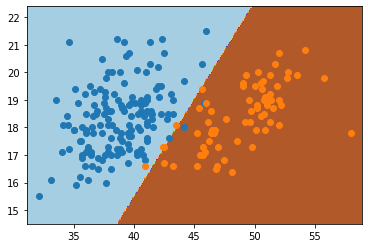

In [ ]:
# Decision surface for binary classification Logistic Regression

# define bounds of the domain
min1, max1 = X[:, 0].min()-1, X[:, 0].max()+1
min2, max2 = X[:, 1].min()-1, X[:, 1].max()+1

# define the x and y scale
x1grid = np.arange(min1, max1, 0.1)
x2grid = np.arange(min2, max2, 0.1)

# create all of the lines and rows of the grid
xx, yy = np.meshgrid(x1grid, x2grid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))

# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))

# define the model
model = LogisticRegression()

# fit the model
model.fit(X, y)
# make predictions for the grid

y_pred = model.predict(grid)

# reshape the predictions back into a grid
zz = y_pred.reshape(xx.shape)

# plot the grid of x, y and z values as a surface
plt.contourf(xx, yy, zz, cmap='Paired')

# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

Further, the prediction here is definit, based on 1 and 0. But the probabilites are not 0% or 100%. The next visualization can better explain how the boundry works. 

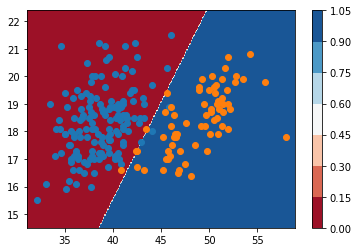

In [ ]:
# plot the grid of x, y and z values as a surface
c = plt.contourf(xx, yy, zz, cmap='RdBu')
# add a legend, called a color bar
plt.colorbar(c)
# create scatter plot for samples from each class
for class_value in range(2):
    # get row indexes for samples with this class
    row_ix = np.where(y == class_value)
    # create scatter of these samples
    plt.scatter(X[row_ix, 0], X[row_ix, 1], cmap='Paired')

Probability is here the color of the backdrop. The more blue, the closer to 1 (belonging to class chinstrap) the more red, the closer to 0 (not belonging to class chinstrap, which means Adelie).

We also see the values of lenght and depth that make the probabilities closer to 1 and 0. Lenght of less than 35 are all red for example. lenghts of more than 50, then all blue. For y, this is not clear (which makes sense with respect to how we saw the data was distributed before).

The fact that the line is not straight, means however, that both features have a weight in the boundry. 

We can also get those exact values and their log odds by looking at the .coef_ and .intercept method of the model. 

For more information about how logistic regression works form a statistical point of view, please refer to the class book Introduction to Statistical Learning https://www.statlearning.com/

# Let's take a look at the metrics now

For this we will use the blood transfusions dataset, and we are again using sklearn mooc course code mentioned above, adapted for this class

In [ ]:
# Load and save the dataset available in github by the same name
uploaded = files.upload()
blood_transfusion = pd.read_csv(io.BytesIO(uploaded['blood_transfusion.csv']))

In [ ]:
# We will now set data and target 


In [ ]:
# Open X


There are two classes in the target, if someone donated blood or not. We will use the Logistic Regression model to predict if someone donates or not blood, with the features Recency, Frequency, Monetary and Time

In [ ]:
# Let's see our classes

In [ ]:
# We will now set up our training and testing data. 

from sklearn.model_selection import train_test_split


To compute the metrics, we need unseen data, right? So in order to keep some data from being used, we will fit the model using only training set. 

In [ ]:
# Logistic Regression


LogisticRegression()

So, as you remember, with a trained or fitted model, the equation coeficients and intercept are calculated, and we can plug in any variables that we want into it. Let's create a fake person named Max Weber. He donated 6 months ago, has been doing this for the last 20 years, donated 5 in the past, and each time 1000 c.c. 

Is Max Weber likely to donate again?????? 

In [ ]:
# Max Weber's prediction 
Max_Weber = pd.DataFrame(
    {
        "Recency": [],
        "Frequency": [],
        "Monetary": [],
        "Time": [],
    }
)

classifier.predict(## )

The model predicted that, no. Max Weber will not donate again. But we do not have any base truth against which we can compare Max Weber to. This is the reason why the unseen classified data is so important! it is our base true that helps us calculate metrics.

In [ ]:
# Here we predict using our unseen data (X_test)


In [ ]:
# And we can compare against the real values!



# Metrics:

## 1. Accuracy

One metric to compute an overall rate of the models performance is to compute how many times our classifier was right (predicted and actual value are the same) and divide it by the number of samples in our set.

ACC = (TP + TN)/ALL

In [ ]:
# Accuracy

In [ ]:
# LogisticRegression has .score which computes the accuracy score.
# (similar to .coef_ or .intercept_)



## 2. Confusion Matrix 

Accuracy is a general score (all the ones that were right), but what if we want to know more details about how the model predicts (finer granularity)? 

There are different types of errors:
-Prediction that a person will give blood but they did not.
-Prediction that a person will not give blood but they did.


In [ ]:
# confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay



We can compute metrics that are more specific to the performance of our classifier for certain type of data.

For the Positive or 1 we have:

-Precision, is defined as TP / (TP + FP) and represents how likely the person actually gave blood when the classifier predicted that they did.

Recall, defined as TP / (TP + FN) represents how likley the persons that actually gave blood are identified.

Why would this be important? 

In [ ]:
# Precision and Recall scores

from sklearn.metrics import precision_score, recall_score



This classifier mislabeled a lot of people who gave blood as "not donated", leading to a very low recall of around 0.1.

What's going on? Why is this metric so low while the accuracy remained ok?

## 3. Class imbalance

In [ ]:
# Class frequency
y_train.value_counts(normalize=True).plot.barh()
plt.xlabel("Class frequency")
_ = plt.title("Class frequency in the training set")

Clearly there is class imbalance. 'Donated' is less than 1/4 of the data. 

To illustrate what is happening, we will use a dummy classifier. 

A dummy classifier is a classifier that will always predict the class as we specify, in this case we select strategy = most_frequent. There is no fiting, no learning


In [ ]:
# Dummy classifier 
from sklearn.dummy import DummyClassifier



The accuracy using a DC is of 76%. The dummy is just as accurate as our fitted model, by saying that all the data is class not donated!

Accuracy then, is not a good metric when we have a class imbalance. Precision and recall might be better metrics to evaluate our model. 

There is also a metric called 'balanced accuracy' which in binary and multiclass classification problems is used to deal with imbalanced datasets.

It is defined as the average of recall obtained on each class.


In [ ]:
# Balanced accuracy
from sklearn.metrics import balanced_accuracy_score


We see a balanced accuracy of around 50%. So quite close to a coin flip.

# Probability thresholds

How is the label decided? There is a probability associated with the prediction, with by default is 0.50 in a binary classification problem. 

In [ ]:
# But we can actually see what the calculated probabilites are



In [ ]:
# And based on that, how the labeled was assigned.



In [ ]:
equivalence_pred_proba = (
    target_proba_predicted.idxmax(axis=1).to_numpy() == target_predicted)
np.all(equivalence_pred_proba)

Sometimes, the 50/50 threshold is not the best for the classification problem we are trying to model. The good news is that we can change the threshold, and recalculate statistics. 

We can plot recall and precision on a graph: 

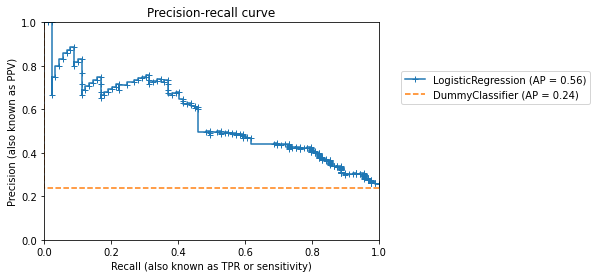

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

disp = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, y_test, pos_label='donated',
    marker="+"
)
disp = PrecisionRecallDisplay.from_estimator(
    dummy_classifier, X_test, y_test, pos_label='donated',
    color="tab:orange", linestyle="--", ax=disp.ax_)
plt.xlabel("Recall (also known as TPR or sensitivity)")
plt.ylabel("Precision (also known as PPV)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Precision-recall curve")

Each blue cross corresponds to a probability value which we used as a decision threshold.

We can see that, by varying this decision threshold, we get different precision vs. recall values.

A perfect classifier would have a precision of 1 for all recall values. The average precision (AP) is the area under the curve. With an ideal classifier, the average precision would be 1.

Notice that the AP of a DummyClassifier coincides with the proportion of number of the positive class in the sample (this number is called the prevalence of the positive class).

In [ ]:

prevalence = (
    y_test.value_counts()[1] / y_test.value_counts().sum()
)
print(f"Prevalence of the class 'donated': {prevalence:.2f}")

Prevalence of the class 'donated': 0.24


The precision and recall metric focuses on the positive class, however, one might be interested in the compromise between accurately discriminating the positive class and accurately discriminating the negative classes.

The statistics used for this are recall (or sensitivity) and specificity.

Specificity: TN / (TN + FP).

Similar to the precision-recall curve, sensitivity and specificity are generally plotted as a curve called the Receiver Operating Characteristic (ROC) curve.

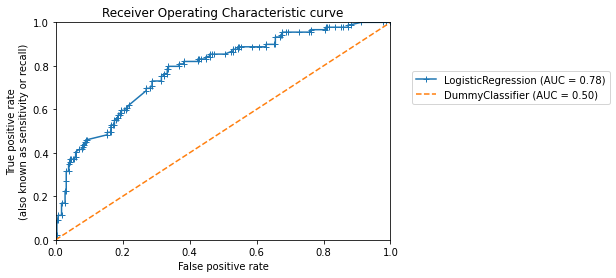

In [ ]:
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(
    classifier, X_test, y_test, pos_label='donated',
    marker="+")
disp = RocCurveDisplay.from_estimator(
    dummy_classifier, X_test, y_test, pos_label='donated',
    color="tab:orange", linestyle="--", ax=disp.ax_)
plt.xlabel("False positive rate")
plt.ylabel("True positive rate\n(also known as sensitivity or recall)")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Receiver Operating Characteristic curve")

The probability threshold varies for determining prediction and compute the metrics.

As with the precision-recall curve, we can compute the area under the ROC (ROC-AUC) to characterize the generalization performance of our classifier.

However, it is important to observe that the lower bound of the ROC-AUC is 0.5.

The generalization performance of a dummy classifier tells us that even the worst generalization performance obtained will be above this line.